# Type1

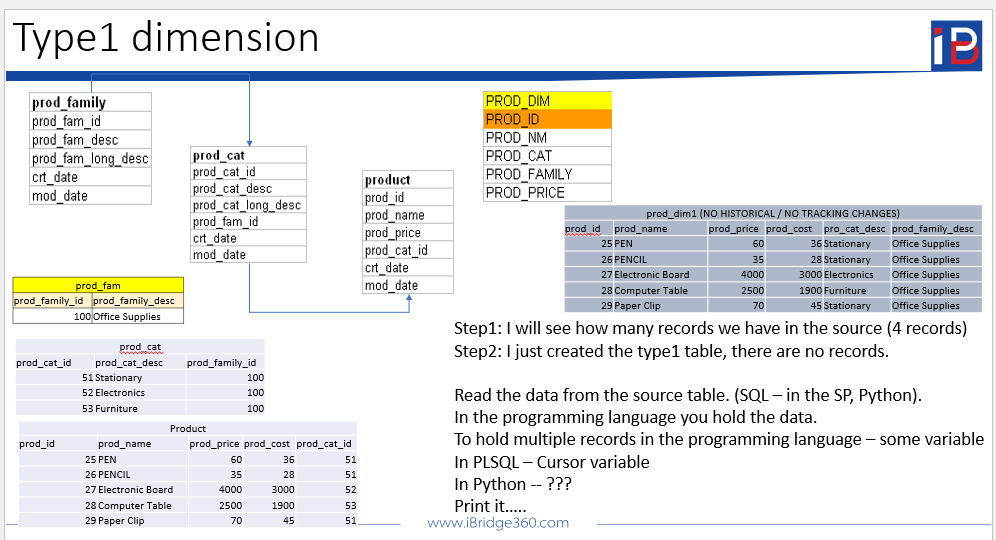

In [23]:
import pandas as pd


In [24]:
df_prod_family = pd.DataFrame({
  "prod_family_id": [100],
  "prod_family_desc": ["Office Supplies"],
})

In [25]:
df_prod_cat = pd.DataFrame({
  "prod_cat_id": [51, 52, 53],
  "prod_cat_desc": ["Stationary", "Electronics", "Furniture"],
  "prod_family_id": [100, 100, 100],
})


In [26]:
df_product = pd.DataFrame({
  "prod_id": [25, 26, 27, 28, 29],
  "prod_name": ["Pen", "Pencil", "Electronic Board", "Computer Table", "Paper Clip"],
  "prod_price": [60, 35, 4000, 2500, 70],
  "prod_cost": [36, 28, 3000, 1900, 45],
  "prod_cat_id": [51, 51, 52, 53, 51],
})

In [27]:
df_prod_family

,prod_family_id,prod_family_desc
0,100,Office Supplies


In [28]:
df_prod_cat

,prod_cat_id,prod_cat_desc,prod_family_id
0,51,Stationary,100
1,52,Electronics,100
2,53,Furniture,100


In [29]:
df_product

,prod_id,prod_name,prod_price,prod_cost,prod_cat_id
0,25,Pen,60,36,51
1,26,Pencil,35,28,51
2,27,Electronic Board,4000,3000,52
3,28,Computer Table,2500,1900,53
4,29,Paper Clip,70,45,51


# Type 2

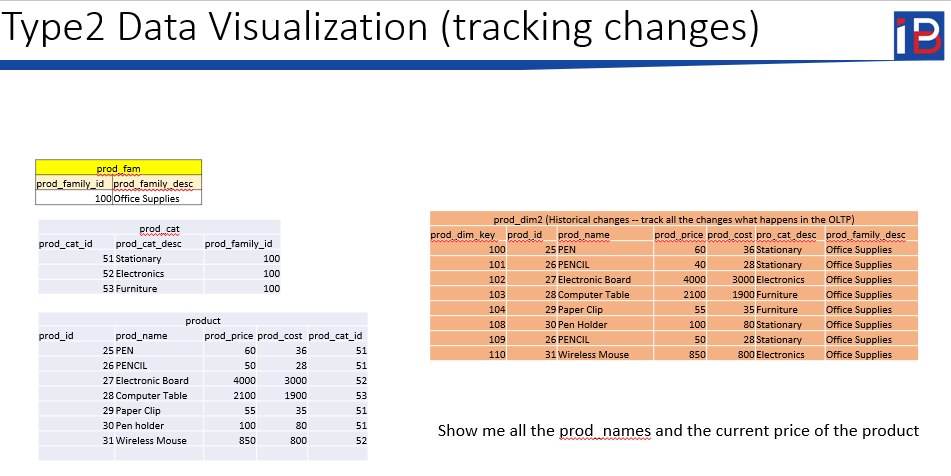

In [30]:
df_prod_cat

,prod_cat_id,prod_cat_desc,prod_family_id
0,51,Stationary,100
1,52,Electronics,100
2,53,Furniture,100


In [31]:
df_prod_family

,prod_family_id,prod_family_desc
0,100,Office Supplies


In [32]:
df_prod_dim2 = pd.merge(df_product[['prod_id','prod_name','prod_price','prod_cat_id']],
                       df_prod_cat[['prod_cat_id','prod_cat_desc','prod_family_id']],
                       on='prod_cat_id',
                       how = 'left')

In [33]:
df_prod_dim2

,prod_id,prod_name,prod_price,prod_cat_id,prod_cat_desc,prod_family_id
0,25,Pen,60,51,Stationary,100
1,26,Pencil,35,51,Stationary,100
2,27,Electronic Board,4000,52,Electronics,100
3,28,Computer Table,2500,53,Furniture,100
4,29,Paper Clip,70,51,Stationary,100


In [34]:
df_prod_dim2 = pd.merge(
    df_prod_dim2,
    df_prod_family[['prod_family_id', 'prod_family_desc']],
    on='prod_family_id',
    how='left' )

In [35]:
df_prod_dim2.drop('prod_family_id',axis=1,inplace=True)
df_prod_dim2.drop('prod_cat_id',axis=1,inplace=True)

In [36]:
df_prod_dim2

,prod_id,prod_name,prod_price,prod_cat_desc,prod_family_desc
0,25,Pen,60,Stationary,Office Supplies
1,26,Pencil,35,Stationary,Office Supplies
2,27,Electronic Board,4000,Electronics,Office Supplies
3,28,Computer Table,2500,Furniture,Office Supplies
4,29,Paper Clip,70,Stationary,Office Supplies


In [37]:
df_prod_dim2['dim_key'] = range (200 ,200+len(df_prod_dim2))

In [38]:
df_prod_dim2

,prod_id,prod_name,prod_price,prod_cat_desc,prod_family_desc,dim_key
0,25,Pen,60,Stationary,Office Supplies,200
1,26,Pencil,35,Stationary,Office Supplies,201
2,27,Electronic Board,4000,Electronics,Office Supplies,202
3,28,Computer Table,2500,Furniture,Office Supplies,203
4,29,Paper Clip,70,Stationary,Office Supplies,204


In [41]:
new_price = float(input("Enter the new product price: "))
prod_name_to_update = input("Enter the product name: ")

existing_product = df_prod_dim2[df_prod_dim2['prod_name'] == prod_name_to_update]

if len(existing_product) > 0:
    for index, row in existing_product.iterrows():
        new_row = row.copy()
        new_row['prod_price'] = new_price
        new_row['dim_key'] = df_prod_dim2['dim_key'].max() + 1  
    
    df_prod_dim2 = df_prod_dim2.append(new_row, ignore_index=True)
else:
    new_prod_cat_desc = input("Enter the product category description: ")
    new_prod_family_desc = input("Enter the product family description: ")
    new_prod_id = int(input('Enter the new product_id : '))
    
    while new_prod_id not in df_product['prod_id']:
        print("Product ID already exists. Please enter a different ID.")
        new_prod_id = int(input('Enter the new product_id : '))
    
    new_row = {
        'prod_id': new_prod_id,
        'prod_name': prod_name_to_update,
        'prod_price': new_price,
        'prod_cat_desc': new_prod_cat_desc,
        'prod_family_desc': new_prod_family_desc,
        'dim_key': df_prod_dim2['dim_key'].max() + 1
    }

    df_prod_dim2 = df_prod_dim2.append(new_row, ignore_index=True)


Enter the new product price: 40
Enter the product name: Pen


C:\Users\DELL\AppData\Local\Temp\ipykernel_3296\741826422.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_prod_dim2 = df_prod_dim2.append(new_row, ignore_index=True)


In [42]:
df_prod_dim2

,prod_id,prod_name,prod_price,prod_cat_desc,prod_family_desc,dim_key
0,25,Pen,60.0,Stationary,Office Supplies,200
1,26,Pencil,35.0,Stationary,Office Supplies,201
2,27,Electronic Board,4000.0,Electronics,Office Supplies,202
3,28,Computer Table,2500.0,Furniture,Office Supplies,203
4,29,Paper Clip,70.0,Stationary,Office Supplies,204
5,25,Pen,40.0,Stationary,Office Supplies,205
6,25,Pen,40.0,Stationary,Office Supplies,206
